In [5]:
#importing required libraries
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:
#loading the data set
data= pd.read_csv("/Users/nandan/Desktop/USA.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
# Check for missing values
if data.isnull().values.any():
    print("Yes, there are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")

    
    
print("-----------------------------------------------------")

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Yes, there are missing values in the dataset.
-----------------------------------------------------
Avg. Area Income                 8
Avg. Area House Age             38
Avg. Area Number of Rooms       21
Avg. Area Number of Bedrooms     7
Area Population                 28
Price                           22
Address                          3
dtype: int64


In [8]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Check if there are duplicate rows
if not duplicate_rows.empty:
    print("Yes, there are duplicate rows in the dataset.")
    print("Duplicate Rows except first occurrence based on all columns:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [9]:
# drop address column as it is a string value

data = data.drop(['Address'],axis=1)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [10]:
columns_with_missing_values = ["Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population","Price"]
data_cleaned = data.dropna(subset=columns_with_missing_values)

In [11]:
# Drop rows with any missing values
data.dropna(axis=0, how='any', inplace=True)


data.reset_index(drop=True, inplace=True)

data.to_csv('/Users/nandan/Desktop/new_dataset.csv', index=False)

In [12]:
print("\nCleaned DataFrame:")
print(data_cleaned.info())


Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4890 non-null   float64
 1   Avg. Area House Age           4898 non-null   float64
 2   Avg. Area Number of Rooms     4898 non-null   float64
 3   Avg. Area Number of Bedrooms  4898 non-null   float64
 4   Area Population               4898 non-null   float64
 5   Price                         4898 non-null   float64
dtypes: float64(6)
memory usage: 267.9 KB
None


In [13]:
#loading clean the new data set

data= pd.read_csv('/Users/nandan/Desktop/new_dataset.csv')
data.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06
6,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06
7,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05
8,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06
9,80527.472083,8.093513,5.042747,4.10,47224.359840,1.707046e+06


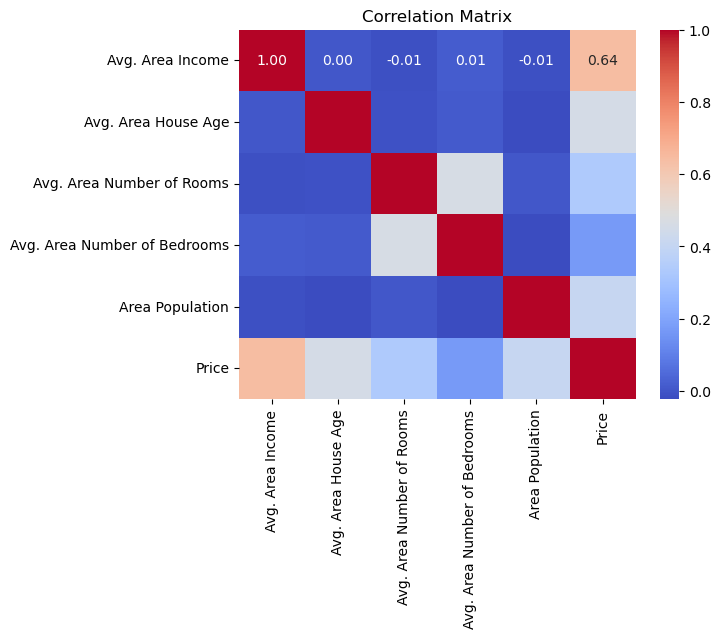

In [14]:
#Correlation Matrix:

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [25]:
import numpy as np
data = np.genfromtxt('/Users/nandan/Desktop/new_dataset.csv', delimiter=',', skip_header=1, usecols=(0, 5), dtype=float)
avg_area_income = data[:, 0]

#Aggregate functions
mean_income = np.mean(avg_area_income)
median_income = np.median(avg_area_income)
std_dev_income = np.std(avg_area_income)
max_income = np.max(avg_area_income)
min_income = np.min(avg_area_income)

print("Mean Avg. Area Income:", mean_income)
print("Median Avg. Area Income:", median_income)
print("Standard Deviation of Avg. Area Income:", std_dev_income)
print("Maximum Avg. Area Income:", max_income)
print("Minimum Avg. Area Income:", min_income)

Mean Avg. Area Income: 68565.85349818242
Median Avg. Area Income: 68765.12877533525
Standard Deviation of Avg. Area Income: 10659.73324936902
Maximum Avg. Area Income: 107701.748377639
Minimum Avg. Area Income: 17796.6311895433


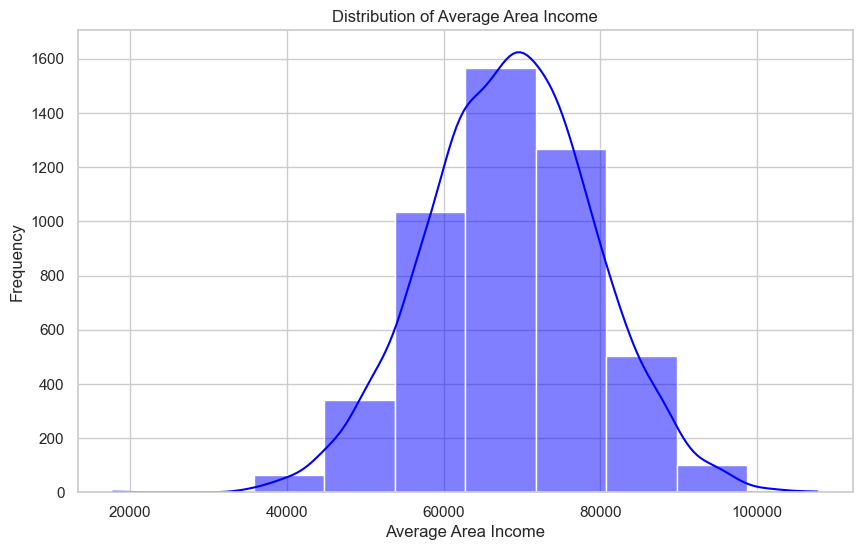

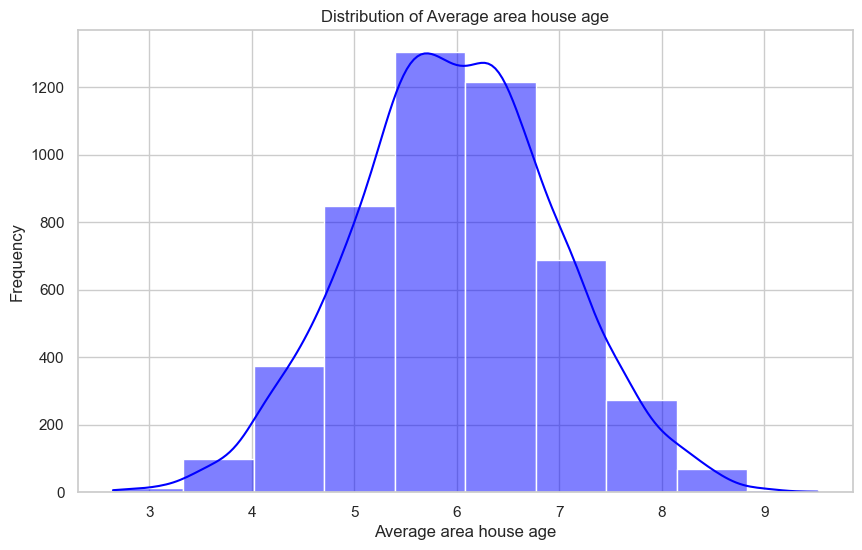

In [22]:
#histograms Avg. Area Income

sns.set(style="whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Avg. Area Income', bins=10, kde=True, color='blue')
plt.title('Distribution of Average Area Income')
plt.xlabel('Average Area Income')
plt.ylabel('Frequency')
plt.show()







sns.set(style="whitegrid")

# List of numerical columns (excluding the target variable 'Price')
numerical_columns = ['Avg. Area House Age']

# Plotting histograms for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=10, kde=True, color='blue')
    plt.title('Distribution of Average area house age')
    plt.xlabel('Average area house age')
    plt.ylabel('Frequency')
    plt.show()

 

/var/folders/8v/hs22hf_91cl60nrww7lr_11r0000gq/T/ipykernel_2268/3710095559.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Avg. Area Number of Rooms Class', y='Price', data=data, ci=None)


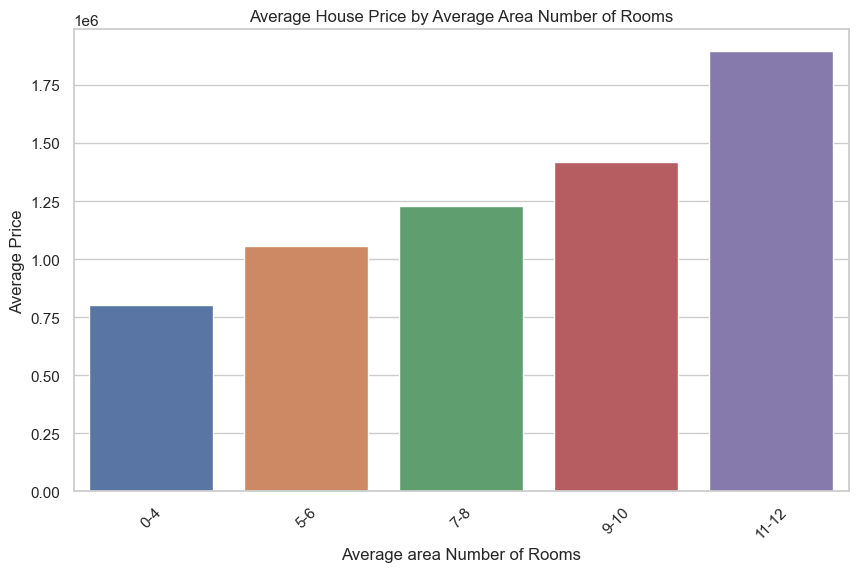

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------


/var/folders/8v/hs22hf_91cl60nrww7lr_11r0000gq/T/ipykernel_2268/3710095559.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Area Population Class', y='Price', data=data, ci=None)


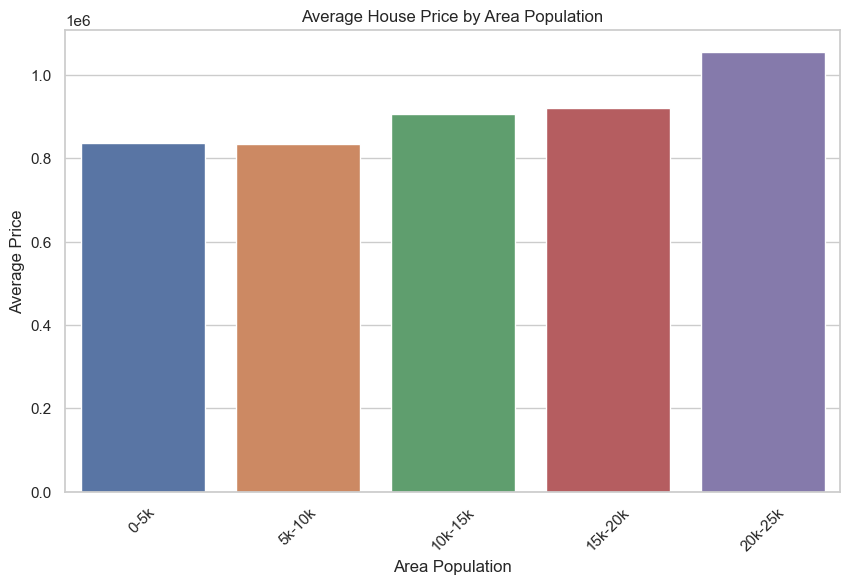

In [17]:
import pandas as pd
# Create bar chart for Average Area Number of Rooms

num_rooms_bins = [0, 4, 6, 8, 10, 12]
num_rooms_labels = ['0-4', '5-6', '7-8', '9-10', '11-12']

# Create bar chart for Average Area Number of Rooms
data['Avg. Area Number of Rooms Class'] = pd.cut(data['Avg. Area Number of Rooms'], bins=num_rooms_bins, labels=num_rooms_labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Avg. Area Number of Rooms Class', y='Price', data=data, ci=None)
plt.title('Average House Price by Average Area Number of Rooms')
plt.xlabel('Average area Number of Rooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.show()

print("-----------------------------------------------------------------------------------------")


print("-----------------------------------------------------------------------------------------")

# Create bar chart for Area Population

population_bins = [0, 5000, 10000, 15000, 20000, 25000]
population_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k']

# Create bar chart for Area Population
data['Area Population Class'] = pd.cut(data['Area Population'], bins=population_bins, labels=population_labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Population Class', y='Price', data=data, ci=None)
plt.title('Average House Price by Area Population')
plt.xlabel('Area Population')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.show()




